# **Customer Data Validator/Cleaner for Churn Analysis**

## Download kaggle dataset for Churn Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('abdallahwagih/telco-customer-churn', path=r'D:\GitHub Projects\Tutorials\python\DSA Principles and Basic Classes\Custom Data Validator\Customer Churn Analysis\data', unzip=True)

kaggle.api.dataset_metadata('abdallahwagih/telco-customer-churn', path=r'D:\GitHub Projects\Tutorials\python\DSA Principles and Basic Classes\Custom Data Validator\Customer Churn Analysis\data')

## Import the dataset for early evaluation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
from collections import defaultdict

raw_df = pd.read_excel(r"D:\GitHub Projects\Tutorials\python\DSA Principles and Basic Classes\Custom Data Validator\Customer Churn Analysis\data\Telco_customer_churn.xlsx")

In [4]:
raw_df.head().T

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
raw_df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [6]:
raw_df.duplicated().sum()

np.int64(0)

In [7]:
raw_df['Count'].value_counts()

Count
1    7043
Name: count, dtype: int64

In [8]:
raw_df = raw_df.drop(columns=['Count'])

In [10]:
for col in ['Country', 'State']:
    print(raw_df[col].value_counts())

Country
United States    7043
Name: count, dtype: int64
State
California    7043
Name: count, dtype: int64


### Exploratory Data Analysis

In [15]:
top_10_cities = raw_df.City.value_counts().head(10)
top_10_cities

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
Fresno            64
Long Beach        60
Oakland           52
Stockton          44
Bakersfield       40
Name: count, dtype: int64

C:\Users\HeroicLog\AppData\Local\Temp\ipykernel_15096\2666199067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_cities.values, x=top_10_cities.index, palette='viridis')


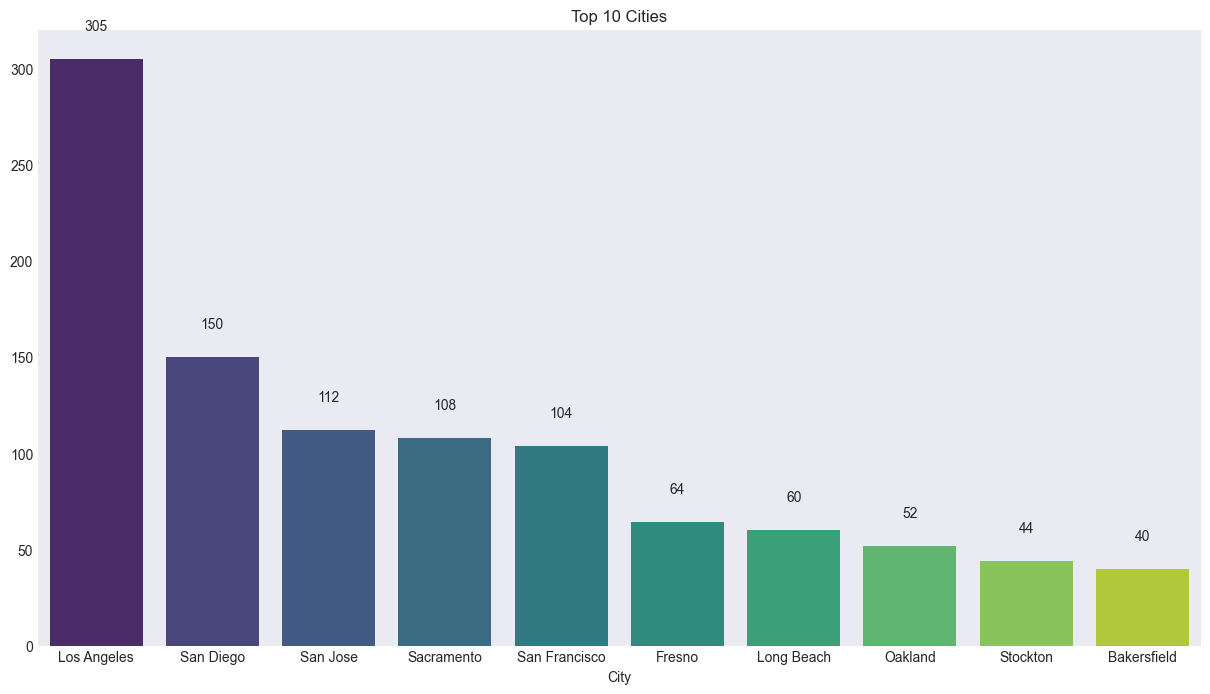

In [23]:
plt.figure(figsize=(15, 8))
plt.style.use('seaborn-v0_8-dark')
sns.barplot(y=top_10_cities.values, x=top_10_cities.index, palette='viridis')
plt.title("Top 10 Cities")
plt.xlabel("City")
for i, count in enumerate(top_10_cities.values):
    plt.text(i, count + 15, str(count), ha='center')
plt.show()

## Create a validator class to work with this dataset

In [ ]:
from enum import Enum

class SolverType(Enum):
    